## Импорт нужных библиотек

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## Считывание тренировочных данных

In [2]:
x_train = pd.read_csv('x_train.csv')
x_train.head()

,properties.tags,properties.light,properties.point.lat,properties.point.long,properties.nearby,properties.weather,properties.category,properties.severity,properties.dead_count,properties.injured_count,properties.road_conditions,properties.participants_count,properties.participant_categories
0,0,0,59.991518,30.434532,27629,0,9,2,0,1,422,2,47
1,0,3,55.763465,37.603433,11042,25,9,0,0,1,4388,2,17
2,0,4,51.848107,107.610397,18728,10,16,0,0,1,3932,2,7
3,0,3,54.523665,52.444070,35142,25,12,1,1,0,3932,1,7
4,0,3,56.346407,43.921881,23047,25,16,0,0,1,3932,3,7


## Считывание тестовых данных

In [3]:
x_test = pd.read_csv('x_test.csv')
x_test.head()

,properties.tags,properties.light,properties.point.lat,properties.point.long,properties.nearby,properties.weather,properties.category,properties.severity,properties.dead_count,properties.injured_count,properties.road_conditions,properties.participants_count,properties.participant_categories
0,0,3,57.390000,36.470000,11683,25,12,1,1,1,3932,2,7
1,0,2,51.391842,80.241416,35142,10,17,0,0,1,3932,2,7
2,0,3,63.568827,53.658729,24548,25,9,2,0,1,4236,2,47
3,1,0,58.105200,38.727300,2497,10,9,2,0,1,2355,2,48
4,0,3,45.111028,43.310595,35142,25,16,2,0,2,3932,4,7


## Считывание тренировочных данных, полученные с помощью кластеризации 

In [4]:
y_train = pd.read_csv('y_train.csv', names=['label'])
y_train.head()

,label
0,0.0
1,4.0
2,1.0
3,4.0
4,1.0


## Считывание тестовых данных, полученные с помощью кластеризации

In [5]:
y_test = pd.read_csv('y_test.csv',names=['label'])
y_test.head()

,label
0,1.0
1,1.0
2,4.0
3,0.0
4,1.0


## Считывание основного датафрейма

In [6]:
df = pd.read_csv('df.csv') # незакодированный dataframe
df.head()

,properties.tags,properties.light,properties.point.lat,properties.point.long,properties.nearby,properties.region,properties.address,properties.weather,properties.category,properties.datetime,properties.severity,properties.dead_count,properties.injured_count,properties.road_conditions,properties.participants_count,properties.participant_categories,level
0,Дорожно-транспортные происшествия,Светлое время суток,51.783772,115.483775,NaN,Шилкинский район,"ДАРАСУН - СОЛНЦЕВО, 143 км",Ясно,Опрокидывание,2019-07-25 16:50:00,С погибшими,1,2,Сухое,3,Все участники,1
1,Дорожно-транспортные происшествия,Светлое время суток,51.600533,115.405197,NaN,Шилкинский район,"ПЕРВОМАЙСК - ЦАГАН-ОЛУЙ - КОНДУЙ, 32 км",Ясно,Опрокидывание,2020-05-16 18:00:00,Тяжёлый,0,2,Сухое,2,Все участники,1
2,Дорожно-транспортные происшествия,"В темное время суток, освещение отсутствует",52.045523,115.939236,"Мост,Нерегулируемый перекрёсток",Шилкинский район,Р-297 Амур Чита - Невер - Свободный - Архара -...,Пасмурно,Столкновение,2019-10-03 20:00:00,Легкий,0,1,Сухое,3,Все участники,1
3,Дорожно-транспортные происшествия,"В темное время суток, освещение отсутствует",51.902130,116.212864,NaN,Шилкинский район,"МОГОЙТУЙ - СРЕТЕНСК - ОЛОЧИ, 137 км",Ясно,Столкновение,2020-11-18 22:00:00,С погибшими,2,0,"Сухое,Недостатки зимнего содержания",3,"Мотоциклисты,Все участники",1
4,Дорожно-транспортные происшествия,Светлое время суток,51.775183,115.854371,Жилые дома индивидуальной застройки,Шилкинский район,"с Казаново, ул Чапаева, 24",Ясно,Съезд с дороги,2021-01-31 05:00:00,Легкий,0,2,Заснеженное,2,Все участники,1


In [12]:
df2 = pd.read_csv('df2.csv') # закодированный dataframe
df2.head()

,properties.tags,properties.light,properties.point.lat,properties.point.long,properties.nearby,properties.weather,properties.category,properties.severity,properties.dead_count,properties.injured_count,properties.road_conditions,properties.participants_count,properties.participant_categories
0,0,3,51.783772,115.483775,35142,25,12,1,1,2,3932,3,7
1,0,3,51.600533,115.405197,35142,25,12,2,0,2,3932,2,7
2,0,2,52.045523,115.939236,28949,10,16,0,0,1,3932,3,7
3,0,2,51.902130,116.212864,35142,25,16,1,2,0,4059,3,33
4,0,3,51.775183,115.854371,6254,25,17,0,0,2,82,2,7


In [15]:
df2['level'] = df['level']

# 3.1 Визуализация зависимостей данных

## Отбор 40000 значений в отдельный dataframe для отображения на графике

In [30]:
new_df = df2.iloc[0:40000]

## Строительство сразу нескольких графиков для уровня и какого-то другого признака

In [24]:
#pd.plotting.scatter_matrix(new_df, c=new_df['level'], figsize=(20, 20), hist_kwds={'bins': 20});

### Используется scatter, так как можно увидеть зависимость

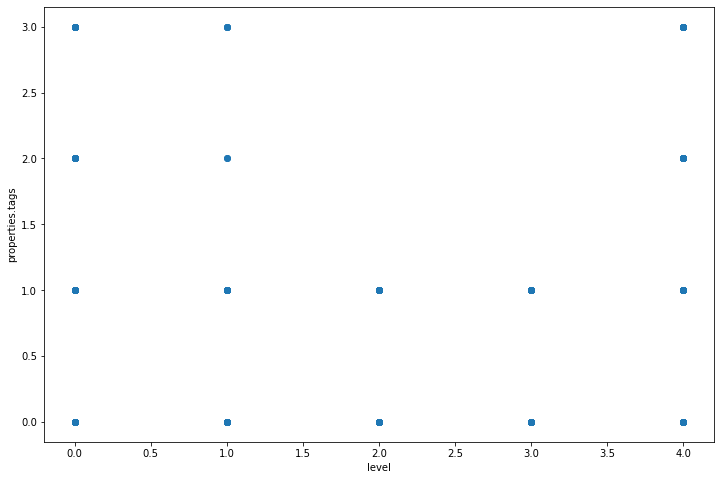

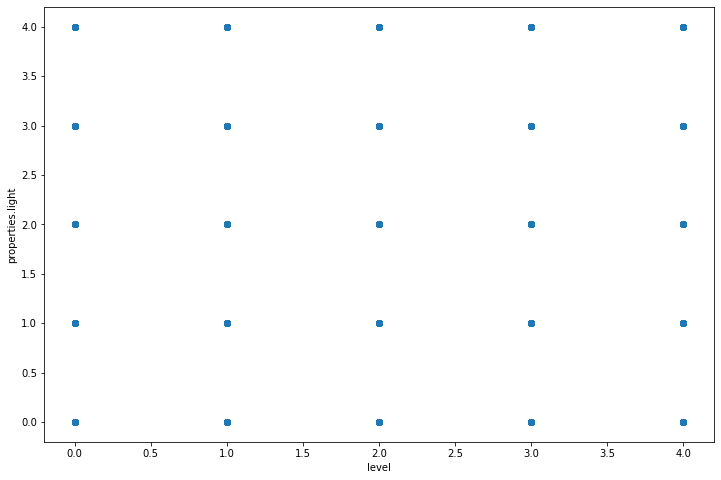

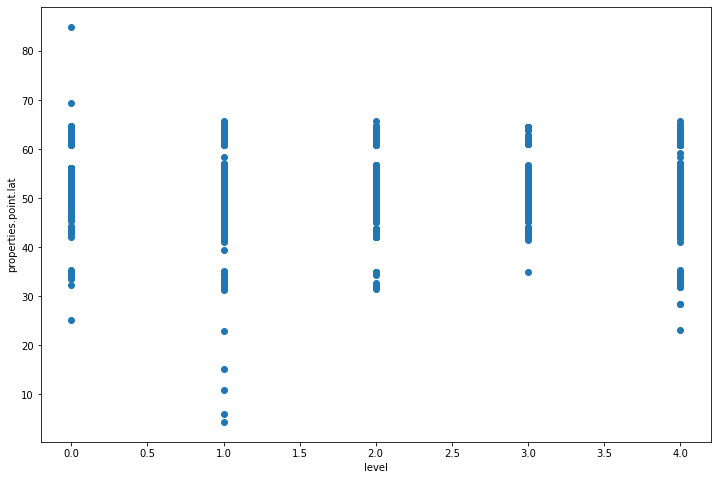

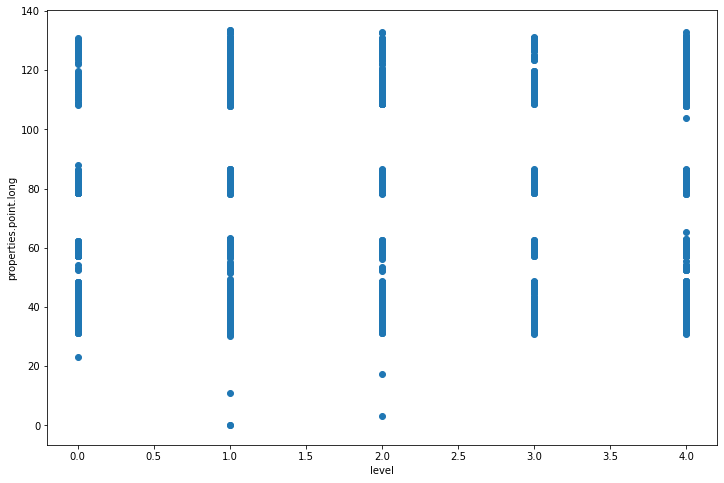

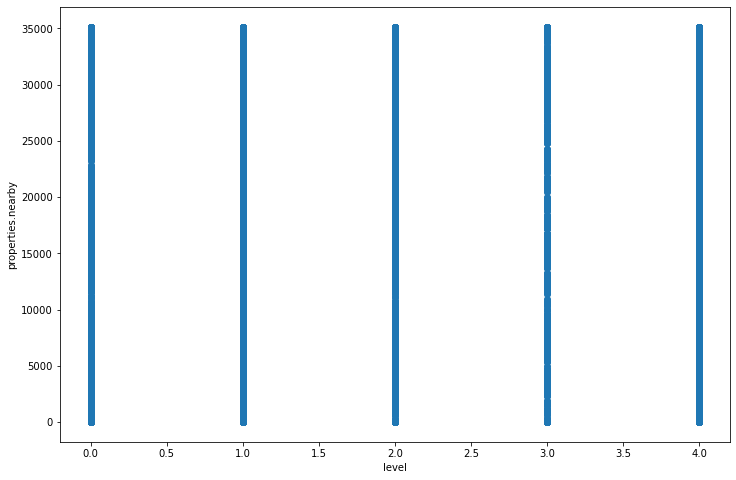

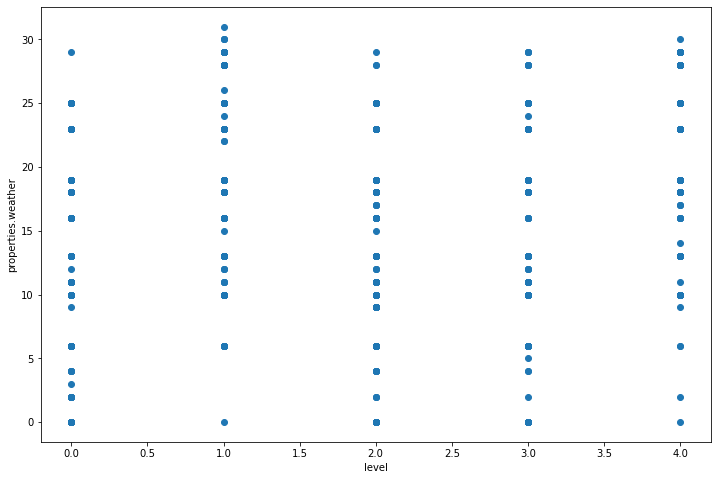

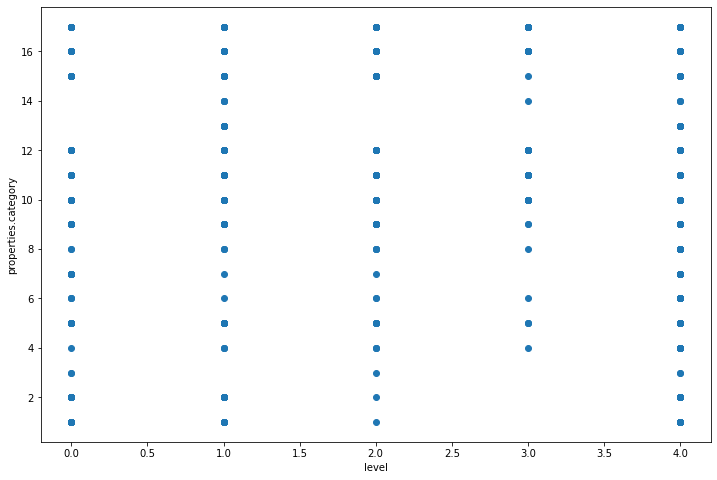

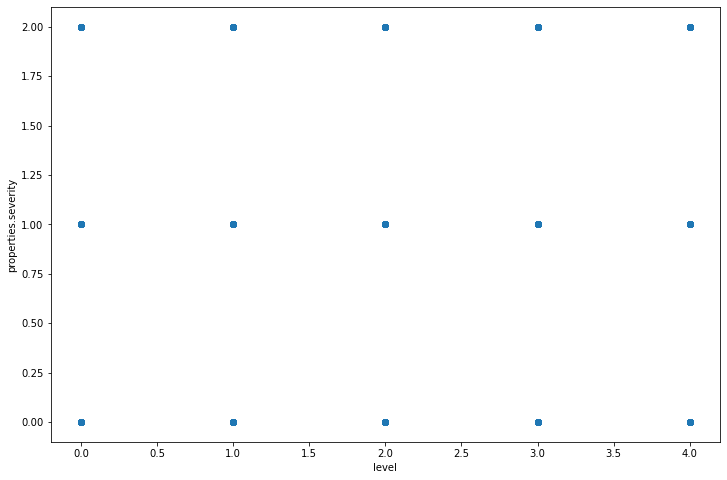

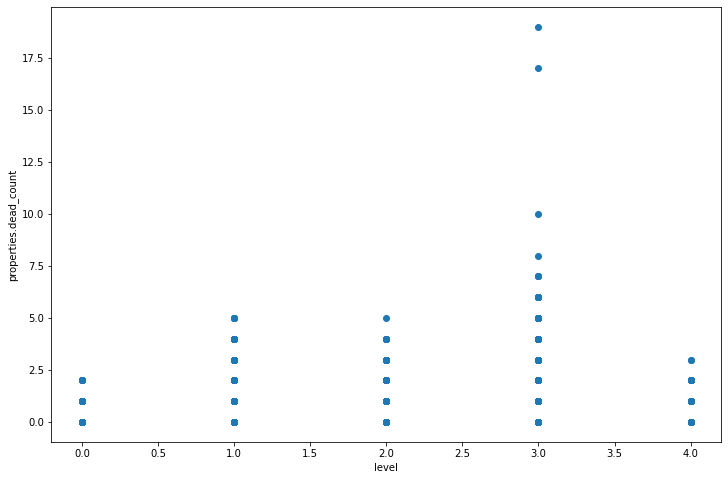

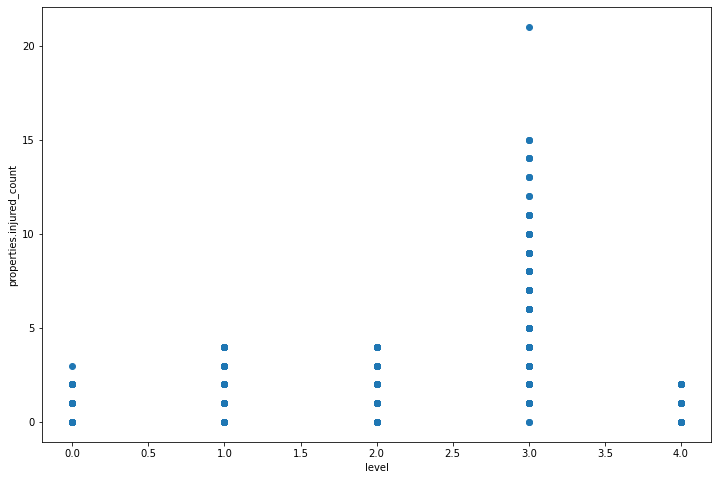

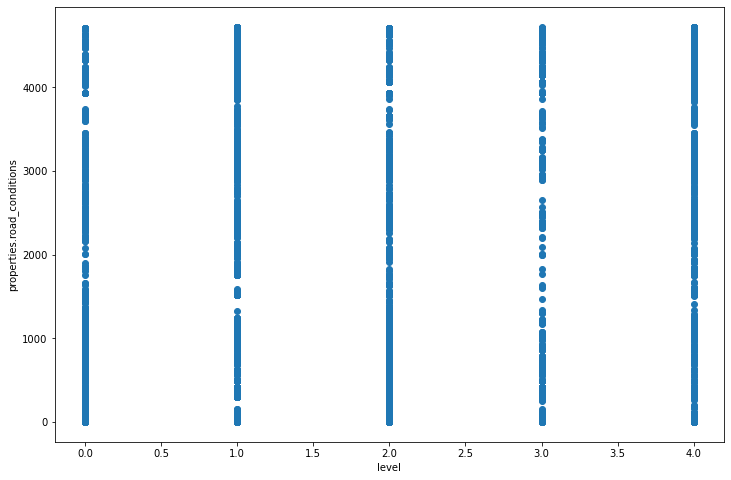

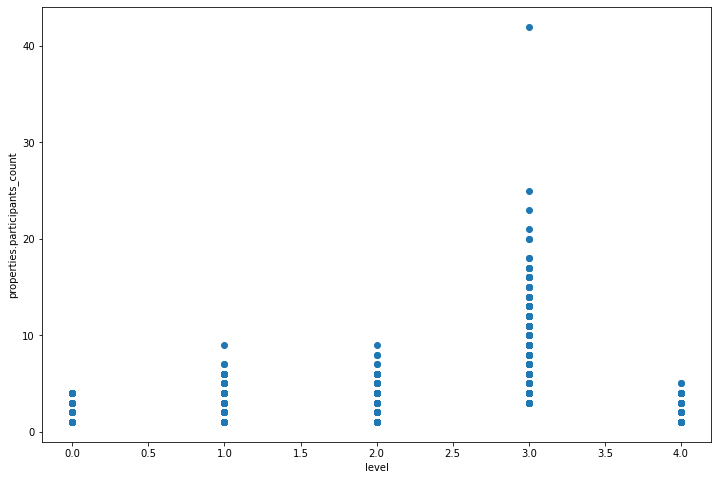

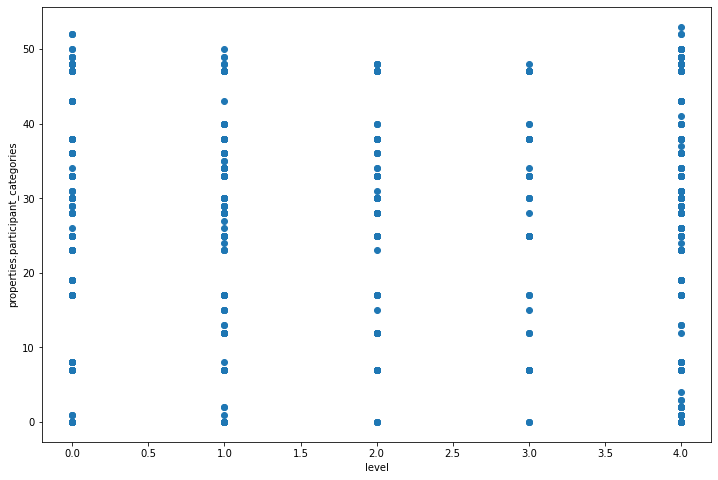

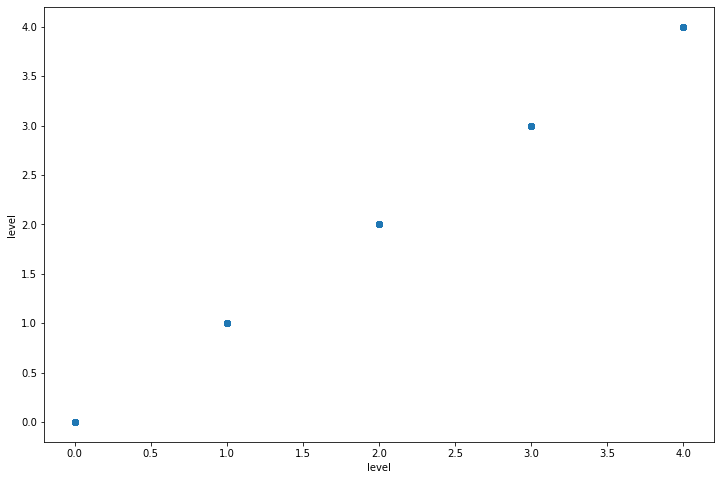

In [31]:
# Проход в цикле по столбцам датафрейма
for i in new_df.columns:
    plt.figure(figsize=(12,8))
    plt.scatter(new_df['level'], new_df[i]);
    plt.xlabel('level')
    plt.ylabel(i)

### уровень опасности зависит от tags(показателя), dead_count(количества мертвых), injured_count(количества раненых), participant_categories(категории участников), road_confitions(состояния дороги) - тк кластеры распределяются неравномерно, в остальных же случаях графики у всех кластеров почти одинаковые

# 3.2 Классификация дорожных объектов

## Используемые модели

### DecisionTreeClassifier - 

Дерево решений - это древовидная структура, подобная блок-схеме, в которой внутренний узел представляет функцию (или атрибут), ветвь представляет правило принятия решений, а каждый конечный узел представляет результат. Самый верхний узел в дереве решений известен как корневой узел. Он учится разделять на основе значения атрибута. Он разбивает дерево рекурсивным способом, называемым рекурсивным разделением. Эта структура, похожая на блок-схему, поможет вам в принятии решений. 

### GaussianNB - 

Наивные байесовские алгоритмы - это группа алгоритмов классификации с контролируемым машинным обучением, основанных на теореме Байеса. Это простой метод классификации, но обладающий высокой функциональностью. Они находят применение, когда размерность входных данных высока. Сложные задачи классификации также могут быть реализованы с помощью наивного байесовского классификатора.

### RandomForestClassifier - 

Случайный лес - это контролируемый алгоритм машинного обучения, используемый для решения задач классификации, а также регрессии. Это тип метода обучения в ансамбле, при котором из обучающего набора данных создается несколько деревьев решений, и большинство результатов из них рассматривается как 

### Эти модели используются из-за хорошей работы на большом объеме данных и простоты их использования

# 3.3 Обучение моделей классификации

### DecisionTreeClassifier

In [11]:
Model1 = tree.DecisionTreeClassifier(criterion='gini')
Model1.fit(x_train, y_train['label'])
print(Model1.score(x_test,y_test['label']))

0.974274383334786


### GaussianNB

In [12]:
Model2 = GaussianNB()
Model2.fit(x_train, y_train['label'])
print(Model2.score(x_test, y_test['label']))

0.8558441558441559


### RandomForestClassifier

In [22]:
model3 = RandomForestClassifier()
model3.fit(x_train, y_train['label'])
print(model3.score(x_test,y_test['label']))

0.9842935587902031


## выбираю модель 3, так как ее score наибольший, и сохраняю ее

In [14]:
import pickle

In [23]:
filename = "result_model.sav"
pickle.dump(model3, open(filename, 'wb'))

In [24]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test['label'])
print(result)

0.9842935587902031


# 3.5 Визуализация данных по географическим признакам

## Импортирование библиотеки для работы с картой и создание самой карты

In [7]:
import folium as f

# Выбираю координаты Москвы
m = f.Map(location = [55.7, 37.6])

## Создание отдельного датафрейма, полученного из основного по определенным условиям

In [19]:
# Уровень опасности равен макс и смертей больше 1
samiy_opasniy = df[(df['level'] == 3) & (df['properties.dead_count'] >= 1)]

## Добавление маркеров по координатам

In [20]:
for index, row in samiy_opasniy.iterrows():
    f.Marker(
        location=[row['properties.point.lat'], row['properties.point.long']],
        icon=f.Icon(color="red", icon="info-sign")
    ).add_to(m)

## Запуск карты

In [ ]:
m # запуск карты

# 3.6 Отчет

## В задании 3.1 была сделана визуализация, отображающая зависимость признаков от уровня опасности

## В задании 3.2 были выбраны модели, которые будут использоваться для дальнейшего обучения

## В задании 3.3 были обучены модели, а также выбрана модель с наибольшим score

## В задании 3.4 ничего нет, так как будет переобучение

## В задании 3.5 были отображены опасные аварии на карте